# Carbon Emissions Prediction


## 1. Import Required Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset


In [3]:
df = pd.read_csv('emissions.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()


Dataset shape: (13149, 3)

Columns: ['Year', 'Country', 'Emission']


,Year,Country,Emission
0,1960.0,Afghanistan,0.41388
1,1961.0,Afghanistan,0.49080
2,1962.0,Afghanistan,0.68859
3,1963.0,Afghanistan,0.70674
4,1964.0,Afghanistan,0.83855


In [4]:
print(df.info())
print(f"\nMissing values:\n{df.isnull().sum()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13149 entries, 0 to 13148
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      13149 non-null  float64
 1   Country   13149 non-null  object 
 2   Emission  13149 non-null  float64
dtypes: float64(2), object(1)
memory usage: 308.3+ KB
None

Missing values:
Year        0
Country     0
Emission    0
dtype: int64


In [5]:
df.describe()

,Year,Emission
count,13149.000000,13149.000000
mean,1992.123279,111.779684
std,18.414983,552.435633
min,1960.000000,0.000000
25%,1976.000000,0.613020
50%,1993.000000,5.706100
75%,2008.000000,43.279300
max,2023.000000,11902.503200


## 3. Data Preprocessing - One Hot Encoding


In [6]:
# Remove any missing values
df = df.dropna()

# One-hot encode the Country column
df_encoded = pd.get_dummies(df, columns=['Country'], prefix='Country')

print(f"Original columns: {df.columns.tolist()}")
print(f"\nAfter one-hot encoding: {df_encoded.shape[1]} columns")
print(f"Number of countries: {df['Country'].nunique()}")
df_encoded.head()
df_encoded.head().astype(int)

Original columns: ['Year', 'Country', 'Emission']

After one-hot encoding: 215 columns
Number of countries: 213


,Year,Emission,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Wallis and Futuna Islands,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,1960,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1961,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1962,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1963,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1964,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Store country names for later use
countries = sorted(df['Country'].unique())
print(f"Total countries: {len(countries)}")
print(f"\nFirst 10 countries: {countries[:10]}")


Total countries: 213

First 10 countries: ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba']


## 4. Prepare Features and Target


In [8]:
# Separate features and target
X = df_encoded.drop('Emission', axis=1)
y = df_encoded['Emission']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()[:5]}... (and {len(X.columns)-5} more)")


Features shape: (13149, 214)
Target shape: (13149,)

Feature columns: ['Year', 'Country_Afghanistan', 'Country_Albania', 'Country_Algeria', 'Country_Andorra']... (and 209 more)


In [9]:
# Scale the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

print("Scaling completed!")
print(f"X_scaled shape: {X_scaled.shape}")
print(f"y_scaled shape: {y_scaled.shape}")


Scaling completed!
X_scaled shape: (13149, 214)
y_scaled shape: (13149,)


## 5. Split Data into Training and Testing Sets


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 10519 samples
Test set: 2630 samples


## 6. Build Neural Network Model


In [11]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    # Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          27,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,889 (148.00 KB)

 Non-trainable params: 0 (0.00 B)

## 7. Train the Model


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5130 - mae: 0.2298 - val_loss: 0.2844 - val_mae: 0.1134
Epoch 2/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2255 - mae: 0.1364 - val_loss: 0.1950 - val_mae: 0.0844
Epoch 3/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1876 - mae: 0.1134 - val_loss: 0.1319 - val_mae: 0.0639
Epoch 4/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1297 - mae: 0.0952 - val_loss: 0.0622 - val_mae: 0.0505
Epoch 5/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1070 - mae: 0.0841 - val_loss: 0.0611 - val_mae: 0.0538
Epoch 6/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1014 - mae: 0.0796 - val_loss: 0.0102 - val_mae: 0.0353
Epoch 7/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0622 - mae: 0.0699 - val_loss: 0.0440 - val_mae: 0.0570
Epoch 8/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0492 - mae: 0.0648 - val_loss: 0.0333 - val_mae: 0.0429
Epoch 9/100
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

## 8. Evaluate Model Performance


In [13]:
# Make predictions on test set
y_pred_scaled = model.predict(X_test, verbose=0)

# Convert back to original scale
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

# Calculate metrics
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print("MODEL PERFORMANCE METRICS")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


MODEL PERFORMANCE METRICS
Mean Squared Error (MSE): 5546.6116
Root Mean Squared Error (RMSE): 74.4756
Mean Absolute Error (MAE): 13.3452
R² Score: 0.9802


In [14]:
y_train_pred_scaled = model.predict(X_train)
y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_train_pred_original = scaler_y.inverse_transform(y_train_pred_scaled)
train_r2 = r2_score(y_train_original, y_train_pred_original)
print(f"Train R² Score: {train_r2:.4f}")

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step
Train R² Score: 0.9751


## 9. Plot Training History


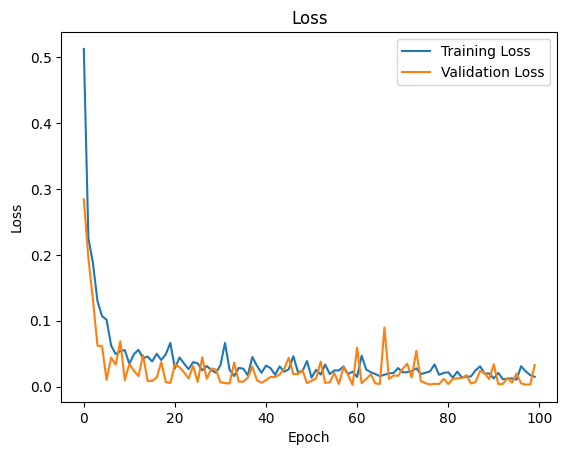

In [15]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('Model MAE')
# plt.xlabel('Epoch')
# plt.ylabel('Mean Absolute Error')
# plt.legend()
# plt.grid(alpha=0.3)
# plt.show()

## 10. Prediction Function


In [17]:
def predict_emission(country_name, year):
    """Predict carbon emission for a given country and year"""
    
    if country_name not in countries:
        return None, f"Country '{country_name}' not found in dataset"
    
    # Create input dataframe with Year and one-hot encoded country
    input_data = {'Year': year}
    
    # Initialize all country columns to 0
    for country in countries:
        input_data[f'Country_{country}'] = 0
    
    # Set the correct country to 1
    input_data[f'Country_{country_name}'] = 1
    
    # Create dataframe with same column order as training data
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Scale the input
    input_scaled = scaler_X.transform(input_df)
    
    # Make prediction
    pred_scaled = model.predict(input_scaled, verbose=0)
    
    # Convert back to original scale
    prediction = scaler_y.inverse_transform(pred_scaled)[0][0]
    
    return prediction, None


## 11. Plot Historical vs Predicted Emissions


In [18]:
def plot_emissions(country_name, future_years=5):
    """Plot historical emissions and predictions for a country"""
    
    if country_name not in countries:
        print(f"Country '{country_name}' not found in dataset")
        return
    
    # Get historical data for the country
    country_data = df[df['Country'] == country_name].sort_values('Year')
    
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    
    # Get the last year in historical data
    last_year = int(country_data['Year'].max())
    
    # Generate future years
    future_years_list = list(range(last_year + 1, last_year + 1 + future_years))
    
    # Make predictions for future years
    predictions = []
    for year in future_years_list:
        pred, error = predict_emission(country_name, year)
        if error:
            print(error)
            return
        predictions.append(pred)
    
    # Plot
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    plt.plot(country_data['Year'], country_data['Emission'], 
             marker='o', label='Historical Emissions', 
             color='steelblue', linewidth=2, markersize=4)
    
    # Plot predictions
    plt.plot(future_years_list, predictions, 
             marker='s', label='Predicted Emissions', 
             color='orangered', linewidth=2, markersize=6, linestyle='--')
    
    # Add vertical line to separate historical and predicted
    plt.axvline(x=last_year, color='gray', linestyle=':', alpha=0.7, linewidth=1.5)
    
    plt.title(f'Carbon Emissions: {country_name} (Historical vs Predicted)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Emissions (Metric Tons CO2)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"\n{country_name} - Emission Statistics")
    print("=" * 50)
    print(f"Historical data: {int(country_data['Year'].min())} - {last_year}")
    print(f"Last recorded emission: {country_data['Emission'].iloc[-1]:.2f}")
    print(f"\nPredictions for next {future_years} years:")
    for year, pred in zip(future_years_list, predictions):
        print(f"  {year}: {pred:.2f}")

def plot_emissions_to_year(country_name, target_year):
    """Plot historical emissions and predictions up to target year"""
    
    if country_name not in countries:
        print(f"Country '{country_name}' not found in dataset")
        return
    
    # Validate target year
    if target_year < 2023 or target_year > 2035:
        print(f"Error: Year must be between 2023 and 2035. You entered: {target_year}")
        return
    
    # Get historical data for the country
    country_data = df[df['Country'] == country_name].sort_values('Year')
    
    if country_data.empty:
        print(f"No data found for {country_name}")
        return
    
    # Get the last year in historical data
    last_year = int(country_data['Year'].max())
    
    # Generate years from last_year+1 to target_year
    if target_year <= last_year:
        # If target year is in historical data, just plot historical
        plot_data = country_data[country_data['Year'] <= target_year]
        
        plt.figure(figsize=(12, 6))
        plt.plot(plot_data['Year'], plot_data['Emission'], 
                 marker='o', label='Historical Emissions', 
                 color='steelblue', linewidth=2, markersize=4)
        plt.title(f'Carbon Emissions: {country_name} (Historical Data)', 
                  fontsize=14, fontweight='bold')
    else:
        # Generate future years
        future_years_list = list(range(last_year + 1, target_year + 1))
        
        # Make predictions for future years
        predictions = []
        for year in future_years_list:
            pred, error = predict_emission(country_name, year)
            if error:
                print(error)
                return
            predictions.append(pred)
        
        # Plot
        plt.figure(figsize=(12, 6))
        
        # Plot historical data
        plt.plot(country_data['Year'], country_data['Emission'], 
                 marker='o', label='Historical Emissions', 
                 color='steelblue', linewidth=2, markersize=4)
        
        # Plot predictions
        plt.plot(future_years_list, predictions, 
                 marker='s', label='Predicted Emissions', 
                 color='orangered', linewidth=2, markersize=6, linestyle='--')
        
        # Highlight the target year
        if target_year in future_years_list:
            target_idx = future_years_list.index(target_year)
            plt.scatter(target_year, predictions[target_idx], 
                       s=200, color='gold', edgecolors='black', 
                       linewidth=2, zorder=5, label=f'Target Year ({target_year})')
            plt.annotate(f'{predictions[target_idx]:.2f}', 
                        (target_year, predictions[target_idx]),
                        xytext=(10, 10), textcoords='offset points',
                        fontsize=10, fontweight='bold')
        
        # Add vertical line to separate historical and predicted
        plt.axvline(x=last_year, color='gray', linestyle=':', alpha=0.7, linewidth=1.5)
        
        plt.title(f'Carbon Emissions: {country_name} (Historical vs Predicted up to {target_year})', 
                  fontsize=14, fontweight='bold')
    
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Emissions (Metric Tons CO2)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print prediction for target year
    if target_year > last_year:
        pred, error = predict_emission(country_name, target_year)
        if not error:
            print(f"\n{country_name} - Prediction for {target_year}")
            print("=" * 50)
            print(f"Predicted Emission: {pred:.2f} metric tons CO2")
            print(f"Last recorded emission ({last_year}): {country_data['Emission'].iloc[-1]:.2f} metric tons CO2")
    elif target_year <= last_year:
        # If target year is in historical data, show actual value
        actual_data = country_data[country_data['Year'] == target_year]
        if not actual_data.empty:
            actual_emission = actual_data['Emission'].values[0]
            print(f"\n{country_name} - Historical Data for {target_year}")
            print("=" * 50)
            print(f"Actual Emission: {actual_emission:.2f} metric tons CO2")



India - Prediction for 2025
Predicted Emission: 2796.37 metric tons CO2
Last recorded emission (2023): 3062.32 metric tons CO2



Generating prediction and graph for India up to 2023...


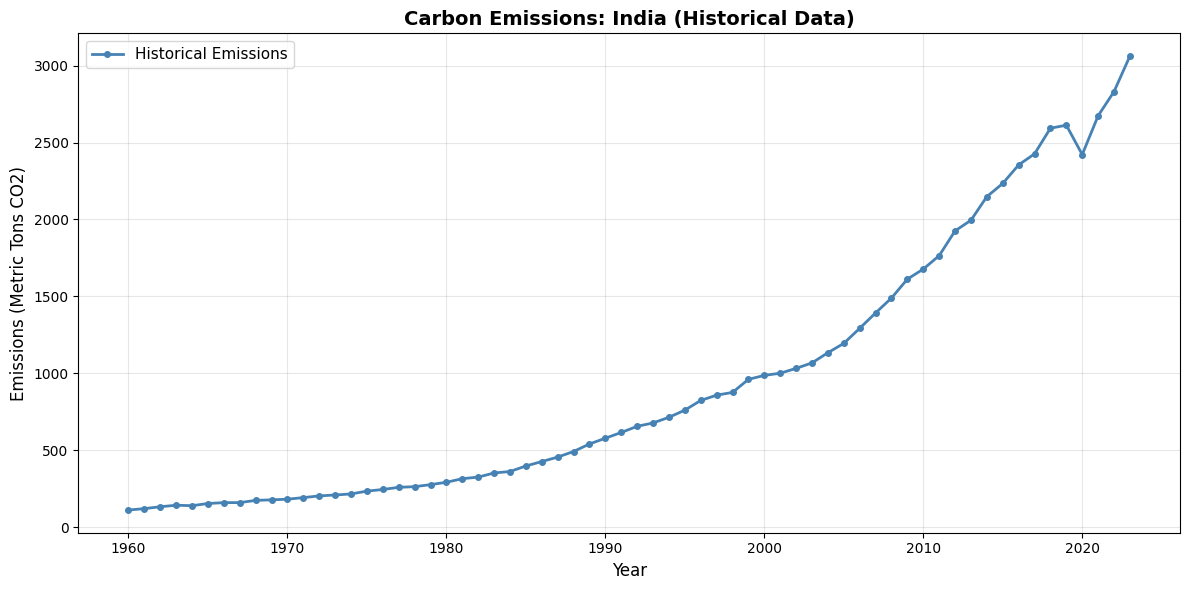

In [19]:
import pickle

artifacts = {
    "model": model,
    "scaler_X": scaler_X,
    "scaler_y": scaler_y,
    "countries": countries,
    "feature_columns": X.columns.tolist(),
    "historical_df": df[['Country', 'Year', 'Emission']].copy()
}

with open("carbon_model.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("Artifacts saved!")

Artifacts saved!
